# PA 5

This is the main of my program, I decided to do it here for visualization purposes. Author: Lorenzo Beltrame

This is just the main and serves as the report of my work. I fixed a seed, therefore the results are reproducible. The functions that I call are stored in different python files located in the submission folder.

In [1]:
# custom libs
from Task_2_functions import initialize_data
from Task_2_functions import plot_image
from Task_2_functions import plot_gallery
from Task_2_functions import my_custom_pca
from Task_2_functions import encode
from Task_2_functions import decode
from Task_2_functions import centre_data
from Task_2_functions import custom_autoencoder_analysis
from MLP import MyMLP
from MLP import relu
from MLP import square
# standard libs
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import sklearn.metrics
from sklearn.neural_network import MLPRegressor
import numpy as np
import pickle
import os.path
from tqdm import tqdm
import h5py
import time



# Task 1.1: implement backpropagation

I started using the code given by professor us by prof. Tschiatschek. 

One important notice is that the professor's implementation appends the X matrix to the vector of self.cache_post_activations, this must be taken into account when indexing its entries.

**My implementation:** I decided to use the post activations already computed in the predict method of the custom MLP. A post activation is appended to the self.cache_post_activations list at the end of the computation done in each later of the NN. Therefore, the last element of the self.cache_post_activations list will be the activation of the last layer. At the same time, the derivative of the activation of the layer is appended to self.cache_derivatives.

Since I am implementing the **back**propagation, I started from the last element of the self.cache_post_activations and of the self.cache_derivatives list to do the following for each layer:

- compute the delta: the mean squared error gradient for the last layer and the product between self.cache_derivatives and the dot product of the weights in the previous iteration (Since we are indexing backward + 1 means previous iteration!) and the previuously computed delta (In the code delta is the previously computed delta!).

- compute the gradients: dot product of the delta and the post activation! And I appended it to the list of gradients to be returned.

- compute the bias gradient: I computed it by summing over the row axis the deltas! And I appended it to the list of bias gradients to be returned.


After that i reverse the two lists I was going to return, since the AdamOptimizer needed the gradients in order (i.e. 1, 2, 3, ..., L where here is the number of hidden layers!).

Finally i cleared the cache memories, since I was calling the (predict method is called each epoch).



I used prof's implementation to print the results.

In [2]:
# Fix randonmness
np.random.seed(42)

# Load data
hf = h5py.File('regression.h5', 'r')
x_train = np.array(hf.get('x_train'))
y_train = np.array(hf.get('y_train'))
x_test = np.array(hf.get('x_test'))
y_test = np.array(hf.get('y_test'))
hf.close()

# normalize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Backpropagation relu + relu

MSE: 56.72: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 69.59it/s]


Training took 1.4409844875335693 seconds.
TRAIN ERROR SCIKIT: 56.22666313322571
TEST ERROR SCIKIT: 60.21512627166829


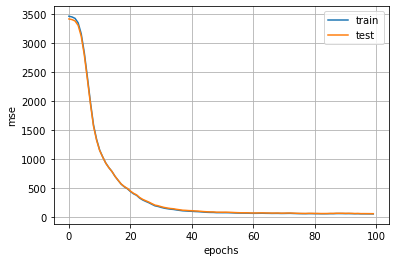

In [3]:
# train MLP
start = time.time()
clf = MyMLP(hidden_layer_sizes=(10, 10,), activations=[relu, relu])
mse_train_bp, mse_test_bp = clf.fit(
    x=x_train, y=y_train, x_test=x_test, y_test=y_test, n_epochs=100, method='backprop')
end = time.time()

# report training time
print("Training took %s seconds." % (end - start))

# plot performance curves
plt.plot(mse_train_bp, label='train')
plt.plot(mse_test_bp, label='test')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()
plt.grid()
plt.savefig('learning-curves.pdf', bbox_inches='tight')
plt.show

## evaluate MLP
y_pred = clf.predict(x_train)
print("TRAIN ERROR SCIKIT:", mean_squared_error(y_pred, y_train))

y_pred = clf.predict(x_test)
print("TEST ERROR SCIKIT:", mean_squared_error(y_pred, y_test))

# Finite difference

MSE: 4.73: 100%|█████████████████████████████████████████████████████████████████████| 100/100 [01:11<00:00,  1.40it/s]

Training took 71.3280029296875 seconds.
TRAIN ERROR SCIKIT: 4.555205772283753
TEST ERROR SCIKIT: 5.222793673047051


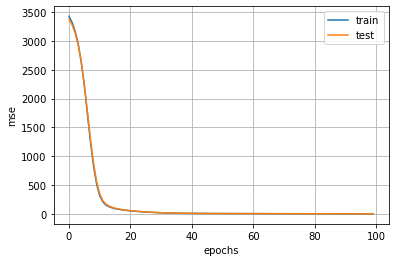

In [4]:
# train MLP
start = time.time()
clf = MyMLP(hidden_layer_sizes=(10, 10,), activations=[relu, relu])
mse_train_fd, mse_test_fd = clf.fit(
    x=x_train, y=y_train, x_test=x_test, y_test=y_test, n_epochs=100, method='fd')
end = time.time()

# report training time
print("Training took %s seconds." % (end - start))

# plot performance curves
plt.plot(mse_train_fd, label='train')
plt.plot(mse_test_fd, label='test')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()
plt.grid()
plt.savefig('learning-curves.pdf', bbox_inches='tight')
plt.show

## evaluate MLP
y_pred = clf.predict(x_train)
print("TRAIN ERROR SCIKIT:", mean_squared_error(y_pred, y_train))

y_pred = clf.predict(x_test)
print("TEST ERROR SCIKIT:", mean_squared_error(y_pred, y_test))

## Task 2.2: A Custom Activation Function

In this part I implemented my custom activation function (I made sure to implement that if the flag gradient was passed to the "square" function it also returned also the gradient).

The partial derivative of y = x^2 is 2x. 

To initialize the weights I used the implementation already present in prof's implementation, it was one of the three explained during classes. I report it here:

W = np.sqrt(2. / (dim1 + dim2)) * np.random.randn(dim2, dim1)

where dim1 is the number of rows of the layer and dim2 the number of columns. (see the code to see how the layers are built).

The biases are initialized as a vector of zeros of lenght equal to the number of layers.

# Replace the second entry with square

MSE: 22.51: 100%|████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 72.55it/s]


Training took 1.3814117908477783 seconds.


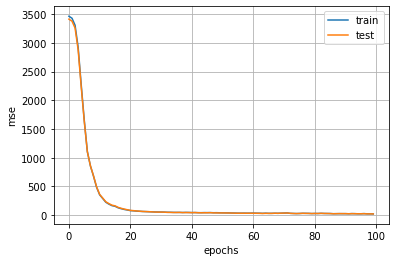

TRAIN ERROR SCIKIT: 20.885867626048267
TEST ERROR SCIKIT: 20.90096505934705


In [5]:
# train MLP
start = time.time()
clf = MyMLP(hidden_layer_sizes=(10, 10,), activations=[relu, square])
mse_train_2, mse_test_2 = clf.fit(
    x=x_train, y=y_train, x_test=x_test, y_test=y_test, n_epochs=100, method='backprop')
end = time.time()

# report training time
print("Training took %s seconds." % (end - start))

# plot performance curves
plt.plot(mse_train_2, label='train')
plt.plot(mse_test_2, label='test')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()
plt.grid()
plt.savefig('learning-curves.pdf', bbox_inches='tight')
plt.show()


## evaluate MLP
y_pred = clf.predict(x_train)
print("TRAIN ERROR SCIKIT:", mean_squared_error(y_pred, y_train))

y_pred = clf.predict(x_test)
print("TEST ERROR SCIKIT:", mean_squared_error(y_pred, y_test))

# Replace the first entry with square

MSE: 136.11: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 73.50it/s]


Training took 1.3644556999206543 seconds.


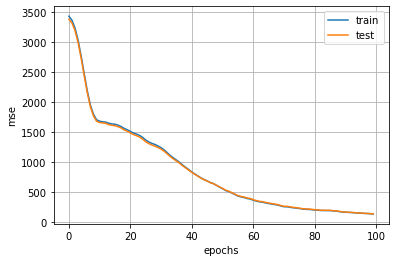

TRAIN ERROR SCIKIT: 132.78881500148367
TEST ERROR SCIKIT: 134.44212802311623


In [6]:
# train MLP
start = time.time()
clf = MyMLP(hidden_layer_sizes=(10, 10,), activations=[square, relu])
mse_train_1, mse_test_1 = clf.fit(
    x=x_train, y=y_train, x_test=x_test, y_test=y_test, n_epochs=100, method='backprop')
end = time.time()

# report training time
print("Training took %s seconds." % (end - start))

# plot performance curves
plt.plot(mse_train_1, label='train')
plt.plot(mse_test_1, label='test')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()
plt.grid()
plt.savefig('learning-curves.pdf', bbox_inches='tight')
plt.show()

## evaluate MLP
y_pred = clf.predict(x_train)
print("TRAIN ERROR SCIKIT:", mean_squared_error(y_pred, y_train))

y_pred = clf.predict(x_test)
print("TEST ERROR SCIKIT:", mean_squared_error(y_pred, y_test))

# Print all the mse for the training

Let's visualize the results of the trainings of a NN with ten neurons and 2 layers!


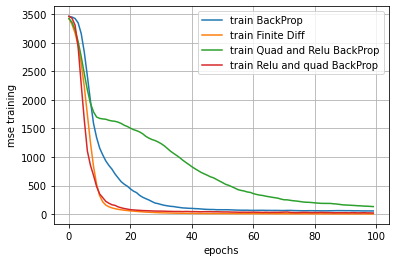

mse of the BackProp in 100 epochs on the training set: 56.22666313322571
mse of the finite difference in 100 epochs on the training set: 4.555205772283753
mse of the Quad and Relu BackProp in 100 epochs on the training set: 132.78881500148367
mse of the Relu and quad BackProp in 100 epochs on the training set: 20.885867626048267


In [7]:
# plot performance curves
print("Let's visualize the results of the trainings of a NN with ten neurons and 2 layers!")
plt.plot(mse_train_bp, label='train BackProp')
plt.plot(mse_train_fd, label='train Finite Diff')
plt.plot(mse_train_1, label='train Quad and Relu BackProp')
plt.plot(mse_train_2, label='train Relu and quad BackProp')
plt.xlabel('epochs')
plt.ylabel('mse training')
plt.legend()
plt.savefig('learning-curves.pdf', bbox_inches='tight')
plt.grid()
plt.show()

# print the last mse
print('mse of the BackProp in 100 epochs on the training set: {}'.format(mse_train_bp[-1]))
print('mse of the finite difference in 100 epochs on the training set: {}'.format(mse_train_fd[-1]))
print('mse of the Quad and Relu BackProp in 100 epochs on the training set: {}'.format(mse_train_1[-1]))
print('mse of the Relu and quad BackProp in 100 epochs on the training set: {}'.format(mse_train_2[-1]))

On the training dataset we can clearly see that in the first iterations "Relu and quad BackProp" and "fd" behave really well, converging fast, the trend is kept when the number of iteration increases.

Relu + quadratic proved to be better than Relu + Relu!

# Print all the mse for the testing

Let's visualize the results of the trainings of a NN with ten neurons and 2 layers!


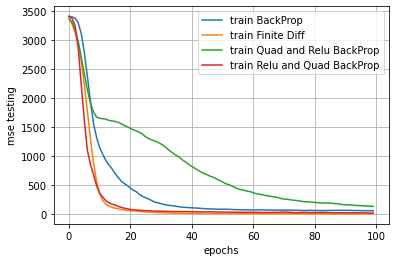

mse of the BackProp in 100 epochs on the testing set: 60.21512627166829
mse of the finite difference in 100 epochs on the testing set: 5.222793673047051
mse of the Quad and Relu BackProp in 100 epochs on the testing set: 134.44212802311623
mse of the Relu and quad BackProp in 100 epochs on the testing set: 20.90096505934705


In [8]:
# plot performance curves
print("Let's visualize the results of the trainings of a NN with ten neurons and 2 layers!")
plt.plot(mse_test_bp, label='train BackProp')
plt.plot(mse_test_fd, label='train Finite Diff')
plt.plot(mse_test_1, label='train Quad and Relu BackProp')
plt.plot(mse_test_2, label='train Relu and Quad BackProp')
plt.xlabel('epochs')
plt.ylabel('mse testing')
plt.legend()
plt.grid()
plt.savefig('learning-curves.pdf', bbox_inches='tight')
plt.show()

# print the last mse
print('mse of the BackProp in 100 epochs on the testing set: {}'.format(mse_test_bp[-1]))
print('mse of the finite difference in 100 epochs on the testing set: {}'.format(mse_test_fd[-1]))
print('mse of the Quad and Relu BackProp in 100 epochs on the testing set: {}'.format(mse_test_1[-1]))
print('mse of the Relu and quad BackProp in 100 epochs on the testing set: {}'.format(mse_test_2[-1]))

On the testing dataset we can clearly see that in the first iterations "Relu and quad BackProp" and "fd" behave really well, converging fast, the trend is kept when the number of iteration increases.

Relu + quadratic proved to be better than Relu + Relu!

The main drawback of Finite difference is the computational time: it is 50 times higher than the backpropagated run times! Overall the main performances with respect to time and mse is the  "Relu and quad BackProp" setting!

# Task 2.1: data exploration

There are 34 different people in the dataset's pictures
There are 2370 different pictures of shape [62, 47]
I visualize ten different pictures presented in the dataset:


<Figure size 720x864 with 0 Axes>

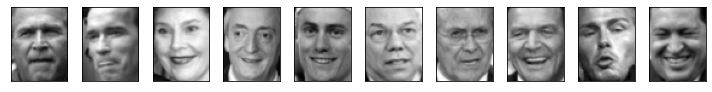


The first ten pictures are associated with:
8
4
21
25
22
5
7
9
6
13


In [2]:
# initialize data
X_train, X_test, y_train, y_test, X = initialize_data()
# normalize the data
X = X / 255
X_train = X_train / 255
X_test = X_test / 255
# centre the data
X, X_mean = centre_data(X)
# I center the data in X_train and X_test by subtracting the average computed wrt X
X_train = X_train - X_mean
X_test = X_test - X_mean


We can clearly notice that they are all faces of different people.

# Task 2.2: my custom PCA

I train my PCA for the requested number of principal components.

The PCA consists of three attributes:

- fit: Performs the fit to compute the principal components. In fit I: I center each column, then compute the covariance matrix, compute eigenvectors and eigenvalues of the covariance matrix, sort the eigenvalues from highest to lowest, save the computed principal components and choose K eigenvectors to get W, where K is given.

- transform: dot multiply W and X to get the projections of the design data onto the dataset.

- reconstruct_images_vectors: reconstruct images from the projection onto the principal components

I used all the dataset to do the principal component analysis and not only the train or the test dataset alone.

The first ten images of the Data Set: 


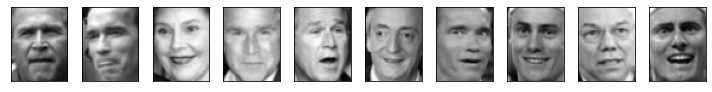

-------------------------------------

The number of PC is computed is: 5


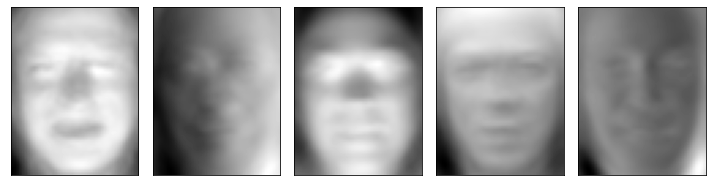

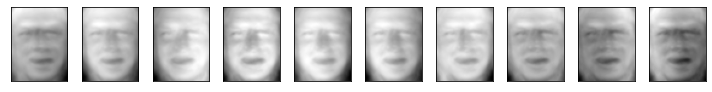

The accuracy score for the training is: 0.26220614828209765
The accuracy score fot the test is: 0.2616033755274262

The number of PC is computed is: 10


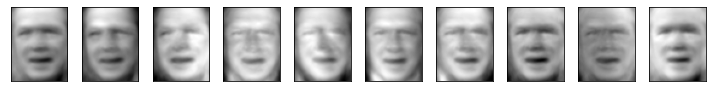

The accuracy score for the training is: 0.35322483423749246
The accuracy score fot the test is: 0.33755274261603374

The number of PC is computed is: 20


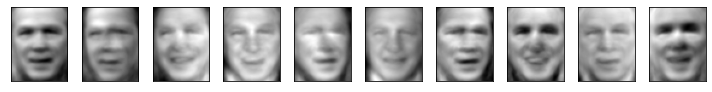

The accuracy score for the training is: 0.5509342977697408
The accuracy score fot the test is: 0.4430379746835443

The number of PC is computed is: 40


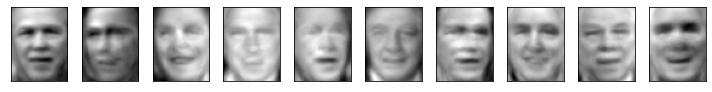

The accuracy score for the training is: 0.779385171790235
The accuracy score fot the test is: 0.5977496483825597

The number of PC is computed is: 80


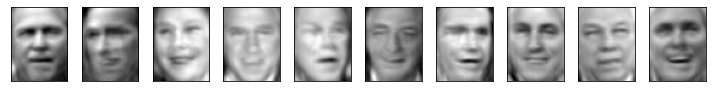

The accuracy score for the training is: 0.9204339963833634
The accuracy score fot the test is: 0.6357243319268636

The number of PC is computed is: 160


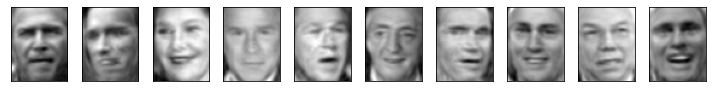

The accuracy score for the training is: 0.9873417721518988
The accuracy score fot the test is: 0.6568213783403657

The number of PC is computed is: 320


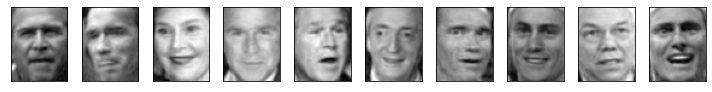

The accuracy score for the training is: 0.9969861362266426
The accuracy score fot the test is: 0.6610407876230661

The number of PC is computed is: 640


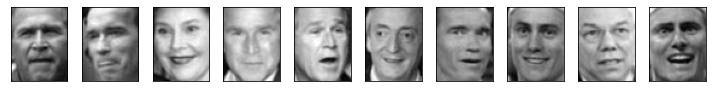

The accuracy score for the training is: 0.9981916817359855
The accuracy score fot the test is: 0.6680731364275668


In [5]:
# plot the first ten images of the dataset, useful when comparing!
print("The first ten images of the Data Set: ")
plot_gallery(X.T, 10)
print("-------------------------------------")


number_PC = [5, 10, 20, 40, 80, 160, 320, 640]
# convenience variables
projections = []
reconstructions = []
cache_pca = []

# initialize the scaler
my_scaler = MinMaxScaler()

# initialize the logistic classifier
# I decided to use saga as the solver
clf = LogisticRegression(max_iter=5000, solver='saga') 

# convenience variable
conv = 0

for j in number_PC:
    # print the number of PC
    print("\nThe number of PC is computed is: {}".format(j))
    
    # initialize
    my_pca = my_custom_pca()
    # fit
    my_pca.fit(X, j, X_mean)
    if conv == 0:
        # visualize the first 5 principal components
        plot_gallery(my_pca.principal_components, num=5)    
    # trasform my data in lower dimensional data
    projections.append(my_pca.transform(X).T)
    # reconstruct the projections
    reconstructions.append(my_pca.reconstruct_images_vectors())
    
    # visualize the first 10 recostructed images
    
    plot_gallery(reconstructions[conv], num=10)
    
    # scale the projections
    my_scaler.fit(projections[conv])
    # create the projection of each train/test set with the PCA fitted over all the data
    train_proj = my_pca.transform(X_train).T
    test_proj = my_pca.transform(X_test).T
    
    # fit
    clf.fit(train_proj, y_train)
    # predict
    predictions_test = clf.predict(test_proj)
    predictions_train = clf.predict(train_proj)
    # accuracy metric
    print("The accuracy score for the training is: {}".format(accuracy_score(predictions_train, y_train)))
    print("The accuracy score fot the test is: {}".format(accuracy_score(predictions_test, y_test)))
    
    # cache the PCAs
    cache_pca.append(my_pca)
    conv += 1

We can clearly observe that the reconstructed images get better and better with the increase of principal component number. This result was expected.

At the same time, the accuracy score both for the training and the testing increases as d increases.
In particular the accuracy for the training gets to 1 if d > 160.

The final accuracy score for d = 640 is satisfying!

# Task 2.3: Autoencoders

Notice: the standard implementation of the sklearn MLP uses the ReLU as the activation function

Since we are fitting autoencoders we want to use the largest number of samples possible, in particular we use all the data (both the train and the test df) when using the method fit of the MLP.

Obviously, when doing the classification task the data are split into train and test, like the usual.

Notice: I saved the fitted model in order to correct the assignment quicker! To test the goodness of the model just delete the model in the submission folder!

Since we are working with autoencoders, I do not center the data anymore, therefore i readd the mean.

NN encoder with the following hyperparameters: hidden_layer_sizes = (500, 200, 40, 200, 500)


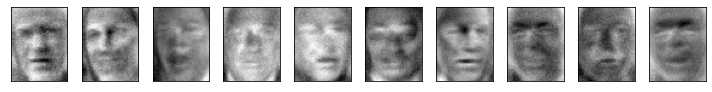

The accuracy score fot the training is: 0.42013261000602775
The accuracy score fot the test is: 0.37130801687763715


In [3]:
# set the parameters
a = 500
b = 200
d = 40
print("NN encoder with the following hyperparameters: hidden_layer_sizes = {}". format((a, b, d, b, a)))

custom_autoencoder_analysis(
    hidden_layer_sizes=(a, b, d, b, a),
        X=X, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='nn_40.pkl')


NN encoder with the following hyperparameters: hidden_layer_sizes = (62, 47, 40, 47, 62)


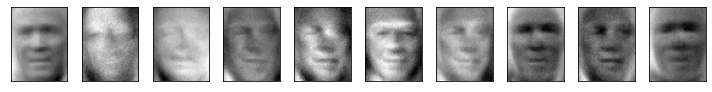

The accuracy score fot the training is: 0.3881856540084388
The accuracy score fot the test is: 0.3389592123769339


In [4]:
# set the parameters
a = 62
b = 47
d = 40
print("NN encoder with the following hyperparameters: hidden_layer_sizes = {}". format((a, b, d, b, a)))

custom_autoencoder_analysis(
    hidden_layer_sizes=(a, b, d, b, a),
    X=X, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='nn_40_mod.pkl')


## Change the parameter d

NN encoder with the following hyperparameters: hidden_layer_sizes = (500, 200, 80, 200, 500)


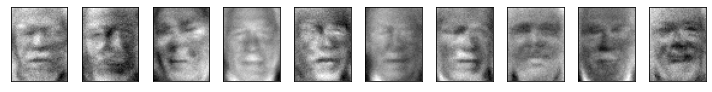

The accuracy score fot the training is: 0.568414707655214
The accuracy score fot the test is: 0.47960618846694797


In [5]:
# set the parameters
a = 500
b = 200
d = 80
print("NN encoder with the following hyperparameters: hidden_layer_sizes = {}". format((a, b, d, b, a)))

custom_autoencoder_analysis(
    hidden_layer_sizes=(a, b, d, b, a),
    X=X, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='nn_80.pkl')

NN encoder with the following hyperparameters: hidden_layer_sizes = (62, 47, 80, 47, 62)


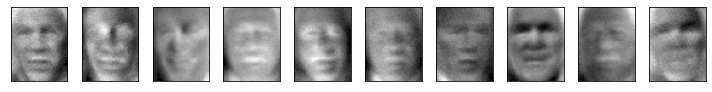

The accuracy score fot the training is: 0.49065702230259195
The accuracy score fot the test is: 0.3924050632911392


In [6]:
# set the parameters
a = 62
b = 47
d = 80
print("NN encoder with the following hyperparameters: hidden_layer_sizes = {}". format((a, b, d, b, a)))

custom_autoencoder_analysis(
    hidden_layer_sizes=(a, b, d, b, a),
    X=X, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='nn_80_mod.pkl')

NN encoder with the following hyperparameters: hidden_layer_sizes = (1500, 1000, 640, 1000, 1500)


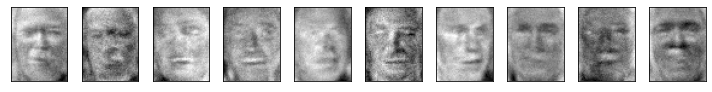

The accuracy score fot the training is: 0.945750452079566
The accuracy score fot the test is: 0.6216596343178622


In [3]:
# set the parameters
a = 1500
b = 1000
d = 640
print("NN encoder with the following hyperparameters: hidden_layer_sizes = {}". format((a, b, d, b, a)))

custom_autoencoder_analysis(
    hidden_layer_sizes=(a, b, d, b, a),
    X=X, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='nn_640.pkl')

d = 40 and d = 80
I can see that the PCA image with 40 and 80 principal components get reconstructed better and yeld to better accuracy scores both on the training dataset and on the testing dataset.

At the same time the autoencoders behave poorly, the reconstructed images are not good. 
This might be due to the fact that the NN learning to encode was not that deep.

I tried to better this results with a larger network with d = 640: the accuracies are satisfying (still less that the PCA) and the reconstructed images are slightly better. The PCA is overall faster.

Probably on larger datasets computing the covariance matrix would be too ex